In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_______________________________________

In [2]:
#Preprocessing an image the network was not trained on

img_path = '/home/joel/Dogs_vs_Cats_Dataset_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/=255.

print(img_tensor.shape)

(1, 150, 150, 3)


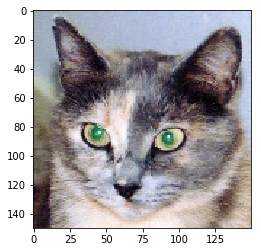

In [6]:
#display the test picture

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [7]:
from keras import models

#extracting the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]

#Creating a model that will return the outputs layer_outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [13]:
#Running the model in predict mode

activations=activation_model.predict(img_tensor)

first_layer_activation = activations[0] #activation of the first conv layer for the cat image picture
print(first_layer_activation.shape) #148x148 feature map with 32 channels

(1, 148, 148, 32)


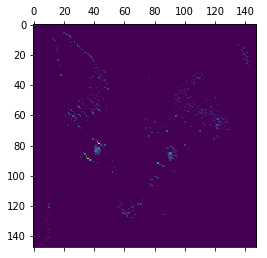

<Figure size 432x288 with 0 Axes>

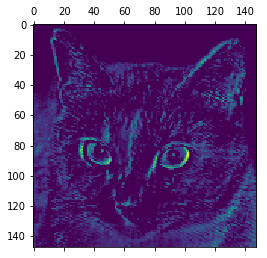

In [28]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,1], cmap='viridis') #Visualizing the 4th channel

plt.figure()

plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis') #Visualizing the 7th channel